# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


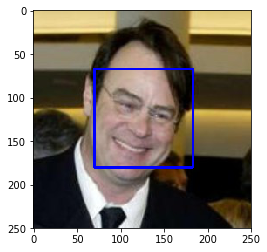

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path

def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
Percentage of human faces found in first 100 samples of human_files is 98.00
Percentage of human faces found in first 100 samples of dog_files is 17.00


In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

count_human=0
for img in human_files_short:
    if(face_detector(img) == True):
        count_human+=1

count_dog=0
for img in dog_files_short:
    if(face_detector(img) == True):
        count_dog+=1
        
print('Percentage of human faces found in first 100 samples of human_files_short is {:.2f}'.format(count_human))
print('Percentage of human faces found in first 100 samples of dog_files_short is {:.2f}'.format(count_dog))


Percentage of human faces found in first 100 samples of human_files_short is 98.00
Percentage of human faces found in first 100 samples of dog_files_short is 17.00


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:06<00:00, 90612686.03it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

#setting the PIL to be tolerant to truncated image files
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True



def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #resizing an input image into the dimensions 224*224 as that is the acceptabel input dimension for VGG16 network
    #We apply a series of normalization , which is the standard normalization for pretrained models.
    
    in_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
    
    #loading an image via Image in PIL
    image = Image.open(img_path)
    
    # here additional color channels if any(other than 3 , RGB) will be removed and a dimenison of 1 is added
    #at the 0th index sing unsqueeze to show the batchsize =1 . 
    #because demensions of input tensor to a pretarined model is of the form 
    #[batch_size, input_channels, height, width]
    
    image=in_transform(image)[:3,:,:].unsqueeze(0)
    
    #if gpu available load them to gpu
    if use_cuda:
        image=image.cuda()
    
    VGG16.eval()
    output=VGG16(image)
    _, index = torch.max(output, 1)
    
    return index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    
    ## TODO: Complete the function.
    index=VGG16_predict(img_path)
    return (index>=151 and index<=268)


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
Percent of dogs found in humans dataset = 0
Percent of dogs found in dog dataset= 100

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
count_human=0
count_dog=0
for img_path in human_files_short:
    if(dog_detector(img_path)):
        count_human+=1
        
for img_path1 in dog_files_short:
    if(dog_detector(img_path1)):
        count_dog+=1

print('Percent of dogs found in humans dataset =',count_human)#percentage of dogs in human dataset of 100 images
print('Percent of dogs found in dog dataset=',count_dog)# percent dogs in dog dataset of 100 images

Percent of dogs found in humans dataset = 0
Percent of dogs found in dog dataset= 100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import torch
import numpy as np
import os
from torchvision import datasets
import torchvision.transforms as transforms

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# we define our standard normalization for input images just like in pre-trained models.

standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
num_workers = 0

#paths for my train, validation and test datasets
train_dir='/data/dog_images/train'
valid_dir='/data/dog_images/valid'
test_dir='/data/dog_images/test'

#defining transforms for my data
data_transforms={'train':transforms.Compose([transforms.RandomResizedCrop(224),
                                             transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor(),
                                            standard_normalization]),
                'valid':transforms.Compose([transforms.Resize(264),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            standard_normalization]),
                'test':transforms.Compose([transforms.Resize(size=(224,224)),
                                            transforms.ToTensor(),
                                            standard_normalization]),
                                           }
#loading the data from ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['valid'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

#loading data from the train_data,valid_data and test_data to their respective Dataloaders so that they are iterbale objects
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True,num_workers=0)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=32,shuffle=True,num_workers=0)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=32,shuffle=False,num_workers=0)

#storing the dataloaders in the form of a dictionary
loaders_scratch={'train':train_loader,
                 'valid':valid_loader,
                 'test':test_loader}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: Since most Pre trained models like VGG16 takes the size (224,224) as input, so I reshaped my input images to this size first.

Yes i have used data augmentation for my train images, i have used transformations RandomResizeCrop(224) and RandomHorizonatalFlip() in sequence. I have used augmentation so that my model generalises better and does not overfit.

For my validation data, I have applied image resizing to 224 and centrecrop along with it.
For my test data I have applied image resizing to 224 only.
I have applied normalization to all three datasets , to match the default normaliation used in pretrained models.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        #this layers sees 224*224*3 as dimensions of one input image and batch size=32
        self.conv1=nn.Conv2d(3,16,3,padding=1)
        
        
        #this layers sees 112*112*16 as dimensions of one input image and batch size=32
        self.bn1=nn.BatchNorm2d(16)
        self.conv2=nn.Conv2d(16,32,3,padding=1)
        
        
        #this layers sees 56*56*33 as dimensions of one input image and batch size=32
        self.bn2=nn.BatchNorm2d(32)
        self.conv3=nn.Conv2d(32,64,3,padding=1)
        
       
        #this layers sees 28*28*68 as dimensions of one input image and batch size=32
        self.bn3=nn.BatchNorm2d(64)
        self.conv4=nn.Conv2d(64,128,3,padding=1)
        
        self.pool=nn.MaxPool2d(2,2)
        
        self.fc1=nn.Linear(128*14*14,512)
        self.fc2=nn.Linear(512,133)
        self.batch_norm = nn.BatchNorm1d(512)
        
        self.dropout=nn.Dropout(p=0.2)
        
        
    
    def forward(self, x):
        ## Define forward behavior
        x=F.relu(self.conv1(x))
        
        x=self.pool(x)
        
        x=self.bn1(x)
        x=F.relu(self.conv2(x))
        x=self.pool(x)
        
        x=self.bn2(x)
        x=F.relu(self.conv3(x))
        x=self.pool(x)
        
        x=self.bn3(x)
        x=F.relu(self.conv4(x))
        x=self.pool(x)
        
        
        x=x.view(-1,128*14*14)
        
        #adding a dropout 
        x = self.dropout(x)
        
        #batch norm for my fully conncted layers
        x=F.relu(self.batch_norm(self.fc1(x)))
        
        #adding droput after frist full connected layer
        x=self.dropout(x)
        
        x=self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

#displaying model architecture to cross check
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (batch_norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  
  (fc1): Linear(in_features=25088, out_features=512, bias=True)
  
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  
  (dropout): Dropout(p=0.2)
  
  (batch_norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  
)


The model has 4 convolutional layers (conv1 , conv2 , conv3 , conv4 ). All convolutional layers have a kernal size of 3 and stride 1. 
conv1 takes 1 channel as input and final conv4 produces 128 channels as output.

The pooling layer of (2,2) is used which will reduce the input size by 2.

I have used ReLU activation function .

I have also added batch normalization for my conv layers conv2, conv3 and conv4 and fully conncted layer fc2.

We have two fully connected layers that finally produces 133 dimensional output.

To tackle overfitting , A dropout of 0.2 is used along with batch normalisation.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = torch.optim.SGD(model_scratch.parameters(), lr=0.03)

#defining loaders_scratch used in code below to access the Dataloader objects
loaders_scratch={'train':train_loader,'valid':valid_loader,'test':test_loader}

In [14]:
#looking the number of batches to get an idea of the number of iterations.
print(len(train_loader))
print(len(test_loader))
print(len(valid_loader))

209
27
27


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            optimizer.zero_grad()
            output=model(data)
            loss=criterion(output,target)
            loss.backward()
            optimizer.step()
            train_loss+=((1/(batch_idx+1))*(loss.data-train_loss))
            
            if batch_idx %100 == 99:
                print('Epoch: {} \tBatch number {}\tTraining Loss: {:.6f} '.format(
                epoch, 
                batch_idx+1,train_loss
                ))
            
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        #turning of dropouts as we dont need to use them for validation
        with torch.no_grad():

            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                output=model(data)
                loss=criterion(output,target)
                valid_loss+=((1/(batch_idx+1))*(loss.data-valid_loss))
            
            # print training/validation statistics 
            print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
                epoch, 
                train_loss,
                valid_loss
                ))
            
            
            ## TODO: save the model if validation loss has decreased
            if valid_loss<=valid_loss_min:
                print("Valid loss dec ({:.6f}-->{:.6f}) Saving Model.......".format(valid_loss_min,valid_loss))
                torch.save(model.state_dict(),save_path)
                valid_loss_min = valid_loss
            
    # return trained model
    return model


In [16]:

# train the model for 10 iterations
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Batch number 100	Training Loss: 4.789968 
Epoch: 1 	Batch number 200	Training Loss: 4.720078 
Epoch: 1 	Training Loss: 4.714350 	Validation Loss: 4.477001
Valid loss dec (inf-->4.477001) Saving Model.......
Epoch: 2 	Batch number 100	Training Loss: 4.525148 
Epoch: 2 	Batch number 200	Training Loss: 4.495844 
Epoch: 2 	Training Loss: 4.492580 	Validation Loss: 4.411072
Valid loss dec (4.477001-->4.411072) Saving Model.......
Epoch: 3 	Batch number 100	Training Loss: 4.392984 
Epoch: 3 	Batch number 200	Training Loss: 4.378560 
Epoch: 3 	Training Loss: 4.377570 	Validation Loss: 4.226881
Valid loss dec (4.411072-->4.226881) Saving Model.......
Epoch: 4 	Batch number 100	Training Loss: 4.276844 
Epoch: 4 	Batch number 200	Training Loss: 4.273821 
Epoch: 4 	Training Loss: 4.274199 	Validation Loss: 4.158312
Valid loss dec (4.226881-->4.158312) Saving Model.......
Epoch: 5 	Batch number 100	Training Loss: 4.236466 
Epoch: 5 	Batch number 200	Training Loss: 4.197333 
Epoch: 5 	Tra

In [17]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.848538


Test Accuracy: 12% (102/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders
loaders_transfer=loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.resnet101(pretrained=True)

if use_cuda:
    model_transfer = model_transfer.cuda()


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:02<00:00, 71891886.86it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I have used the resnet101 architecture in the torchvision.models library, pre-trained on Imagenet dataset, because it had low top-1 and top-5 error rates.

The architecture is 101 layers deep.

I froze training for all layers, and replaced the last fully connected layer with a new layer 
(fc): Linear(in_features=2048, out_features=133, bias=True), to solve our classification task into 133 classes.

CrossEntropy loss function is chosen as loss function.

I have trained my model for 5 epochs, and got an accuracy of 82% .

Trained for 5 epochs and got 84% accuracy.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [21]:
for param in model_transfer.parameters():
    param.requires_grad = False
    
model_transfer.fc = nn.Linear(2048, 133, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [22]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [23]:
# train the model
model_transfer =  train(5, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Batch number 100	Training Loss: 4.291745 
Epoch: 1 	Batch number 200	Training Loss: 3.733979 
Epoch: 1 	Training Loss: 3.691334 	Validation Loss: 2.234288
Valid loss dec (inf-->2.234288) Saving Model.......
Epoch: 2 	Batch number 100	Training Loss: 2.372704 
Epoch: 2 	Batch number 200	Training Loss: 2.168101 
Epoch: 2 	Training Loss: 2.151158 	Validation Loss: 1.285487
Valid loss dec (2.234288-->1.285487) Saving Model.......
Epoch: 3 	Batch number 100	Training Loss: 1.644937 
Epoch: 3 	Batch number 200	Training Loss: 1.558952 
Epoch: 3 	Training Loss: 1.550297 	Validation Loss: 0.900223
Valid loss dec (1.285487-->0.900223) Saving Model.......
Epoch: 4 	Batch number 100	Training Loss: 1.323512 
Epoch: 4 	Batch number 200	Training Loss: 1.284061 
Epoch: 4 	Training Loss: 1.276510 	Validation Loss: 0.721719
Valid loss dec (0.900223-->0.721719) Saving Model.......
Epoch: 5 	Batch number 100	Training Loss: 1.154268 
Epoch: 5 	Batch number 200	Training Loss: 1.129018 
Epoch: 5 	Tra

In [24]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [25]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.701330


Test Accuracy: 84% (707/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [26]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]


def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    in_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406),
                                                            (0.229, 0.224, 0.225))])

    image=in_transform(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        image=image.cuda()
    
    model_transfer.eval()
    _,idx = torch.max(model_transfer(image),1)
       
    return class_names[idx]


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [27]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
    if dog_detector(img_path) == True:
        print('Dogs found ! \n You look like {}'.format(predict_breed_transfer(img_path)))
    
    ## handle cases for a human face, dog, and neither
    
    elif face_detector(img_path) == True :
        print("Hello, human!\nIf you were a dog..You may look like a {}".format(predict_breed_transfer(img_path)))
    else:
        print('Error ! Nether human nor dog')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I think the model created using transfer learning performed very well. It performed better than i expected , because it achieved an accuracy of 84% in just 5 epochs !

However the things we could do to improve this model even more would be:

1)More training data would help the model learn better so we can supply the model with more images

2)We could also curate our dataset so that i contains evenly distributed dog breed photos so that there is a balance and the model is not biased.

3)We could apply more image augmentation to train the model for genralising better and to improve accuracy.

4)We could tune our hyperparamters and epochs, and train longer to see the best point for our model to save the weights.

In [28]:
# first check if we are able see the imagefiles in our workpace that we have put in a new folder called localimages
import os
from os import listdir
for img_file in os.listdir('./localimages'):
    print(img_file)

0250d35d0fded3b57b7768b238db4aa9.jpg
im-200654.jpeg
74968110-cute-english-bulldog-portrait-selective-focus.jpg
2010-kodiak-bear-1.jpg
Hair_Female_Studio_Smile-1296x728-header-1296x728.jpg
maxresdefault.jpg
Lotus-Track-Car-Concept-1a-1024x555.jpg
1477424710-13909202-1247065198637610-3292415026288027606-o.jpg
images.jpeg
human-images.png
unique-fox-red.jpg


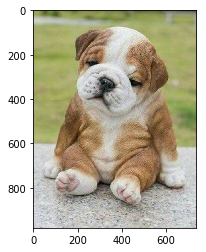

Dogs found ! 
 You look like Bulldog


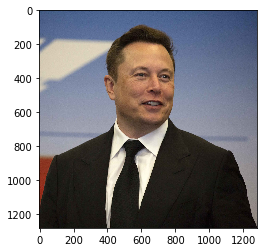

Hello, human!
If you were a dog..You may look like a Boxer


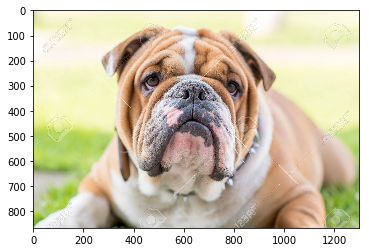

Dogs found ! 
 You look like Bulldog


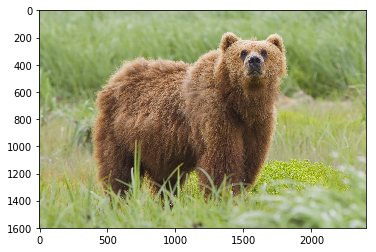

Error ! Nether human nor dog


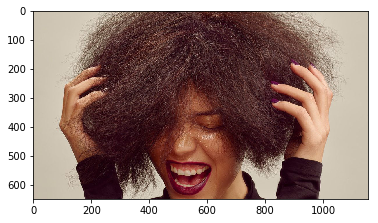

Hello, human!
If you were a dog..You may look like a Poodle


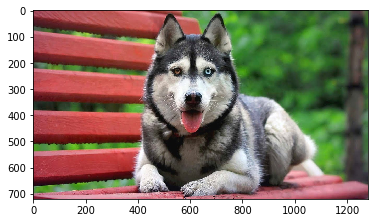

Dogs found ! 
 You look like Alaskan malamute


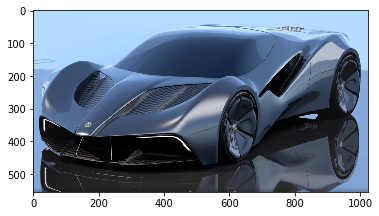

Error ! Nether human nor dog


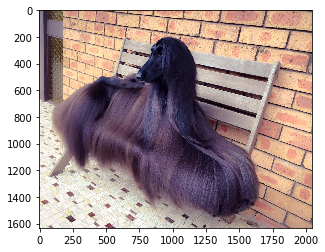

Dogs found ! 
 You look like Chinese crested


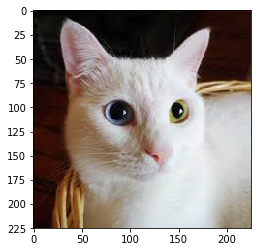

Error ! Nether human nor dog


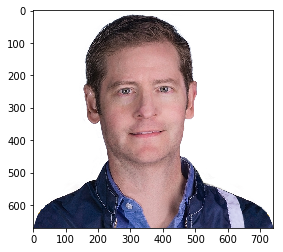

Hello, human!
If you were a dog..You may look like a Bull terrier


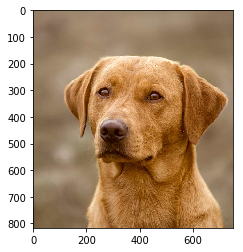

Dogs found ! 
 You look like Chesapeake bay retriever


In [29]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.

#i have used os.path.join to create a imagefile path and then use it for prediction.

for img_file in os.listdir('./localimages'):
    img_path = os.path.join('./localimages', img_file)
    run_app(img_path)

In [30]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
#    run_app(file)